1、 Hand code a 3-layer NN with binary cross entropy loss ( only NumPy allowed ), including bias term ( B) 

2、 Hand code a 3 layer NN with leaky relu as activation,  linear output and MSE as loss 

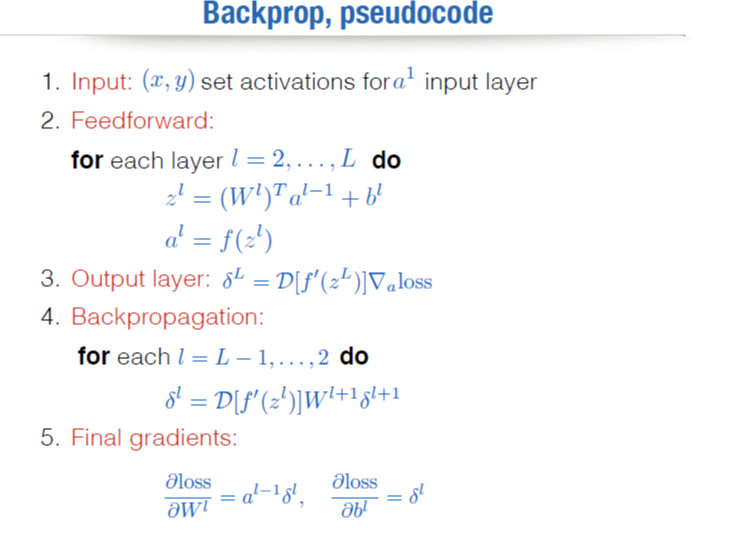

In [8]:
import numpy as np

In [15]:
N, D_in, H1, H2, D_out = 64, 1000, 128, 32, 10

# Create random input and output data
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

# Randomly initialize weights
w1 = np.random.randn(D_in, H1)*0.01
w2 = np.random.randn(H1, H2)*0.01
w3 = np.random.randn(H2, D_out)*0.01
b1 = np.zeros(H1)
b2 = np.zeros(H2)
b3 = np.zeros(D_out)

eta = 1e-5

In [16]:
def relu(x):
    A = np.maximum(0, x)
    return A, x

def leaky_relu(Z):
    A = np.maximum(0.1 * Z, Z)
    return A, Z

def softmax(x):
    A = np.exp(x) / np.sum(np.exp(x), axis=0)
    return A, x

In [17]:
def forward(x, w1, w2, w3, b1, b2, b3):
    Z1 = np.dot(x, w1) + b1
    A1, Z1 = relu(Z1)

    Z2 = np.dot(A1, w2) + b2
    A2, Z2 = relu(Z2)

    Z3 = np.dot(A2, w3) + b3
    A3, Z3 = softmax(Z3)
    return A1, A2, A3

# _, _, A3 = forward(x, w1, w2, w3, b1, b2, b3)
# print(A3)

In [18]:
def relu_gradient(A):
    dA = np.int64(A > 0)
    return dA

In [19]:
def backward(A1, A2, A3, W1, W2, W3, b1, b2, b3, x, y, eta):
    dA2 = relu_gradient(A2)
    dA1 = relu_gradient(A1)

    delta3 = A3 - y
    delta2 = dA2 * (delta3@W3.T)
    delta1 = dA1 * (delta2@W2.T)
    
    W3 = W3 - eta * (A2.T@delta3)
    W2 = W2 - eta * (A1.T@delta2)
    W1 = W1 - eta * (x.T@delta1)
    
    b3 = b3 - eta * delta3
    b2 = b2 - eta * delta2
    b1 = b1 - eta * delta1
    
    return W1, W2, W3, b1, b2, b3

In [20]:
for t in range(500):
    A1, A2, A3 = forward(x, w1, w2, w3, b1, b2, b3)
    
    loss = - np.sum(y*(np.log(A3)))
    print(f"{t}:\t{loss}")

    w1, w2, w3, b1, b2, b3 = backward(A1, A2, A3, w1, w2, w3, b1, b2, b3, x, y, eta)

0:	17.01455178467677
1:	17.007931733693255
2:	17.001311876530252
3:	16.99469296633947
4:	16.98807406758266
5:	16.981455259443024
6:	16.97483681539785
7:	16.9682183213328
8:	16.96159986966373
9:	16.95498145820963
10:	16.948363073929713
11:	16.94174476787863
12:	16.935126338560067
13:	16.92850798761745
14:	16.921889647777334
15:	16.915271319258977
16:	16.908653106119985
17:	16.902034693303946
18:	16.895416396770003
19:	16.8887981109379
20:	16.882179870819172
21:	16.875561570994492
22:	16.868943317601023
23:	16.86232507434191
24:	16.855706841392276
25:	16.849088694114826
26:	16.842470406967323
27:	16.83585220578236
28:	16.829234014664934
29:	16.822615843656337
30:	16.81599767760872
31:	16.80937965000173
32:	16.802761633291084
33:	16.796143627944787
34:	16.789525678642264
35:	16.782907646705226
36:	16.776289670220535
37:	16.76967170429306
38:	16.763053748440186
39:	16.75643589171311
40:	16.749817866820024
41:	16.743199940770808
42:	16.736582024506475
43:	16.72996414070579
44:	16.7233462212

411:	14.295873320703265
412:	14.289262093968574
413:	14.282651682740422
414:	14.276040848418475
415:	14.269430309605113
416:	14.262819708853058
417:	14.256208745301123
418:	14.249598319192216
419:	14.24298747535694
420:	14.236376702366954
421:	14.22976592942976
422:	14.223155110845141
423:	14.21654468704915
424:	14.209933544389543
425:	14.203323178198445
426:	14.196712160787555
427:	14.190101435611865
428:	14.183490477225433
429:	14.176879834257306
430:	14.170268905845504
431:	14.163658216991223
432:	14.157047649017102
433:	14.150436713918666
434:	14.143825852258459
435:	14.137214870578305
436:	14.130604165575008
437:	14.123993224183494
438:	14.117382195974358
439:	14.110771854104584
440:	14.104161899417676
441:	14.097552335540783
442:	14.090942507467076
443:	14.084333179184853
444:	14.077723315743214
445:	14.071113602420937
446:	14.06450402258372
447:	14.05789442341721
448:	14.05128486426986
449:	14.044675068891337
450:	14.038065503041963
451:	14.031455847003443
452:	14.02484574922556